In [70]:
import geopandas as gp
import pandas as pd
import os
#import json
#import pylab as pl
import zipfile
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### a) Combining the LL84 (2011) and the Pluto data extract variables that describe locational, structural, functional, and mechanical characteristics of NYC buildings)

In [2]:
#download energy data 
!curl -O 'https://data.cityofnewyork.us/api/views/q39e-7gbs/rows.csv?accessType=DOWNLOAD'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  441k    0  441k    0     0   678k      0 --:--:-- --:--:-- --:--:--  678k


In [3]:
nrg = gp.GeoDataFrame.from_csv('rows.csv?accessType=DOWNLOAD')

In [4]:
#download Bronx pluto data 
if not os.path.exists('bx'):
    os.makedirs('bx') 
    
if not os.path.exists('bx/bx_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/bx_mappluto_16v2.zip'
    os.system("mv bx_mappluto_16v2.zip bx")
    
if not os.path.exists('bx/BXMapPLUTO.shp'):    
    zf = zipfile.ZipFile('bx/' + 'bx_mappluto_16v2.zip')
    zf.extractall("bx")
    zf.close


In [5]:
#download Brooklyn pluto data 
if not os.path.exists('bk'):
    os.makedirs('bk') 
    
if not os.path.exists('bk/bk_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/bk_mappluto_16v2.zip'
    os.system("mv bk_mappluto_16v2.zip bk")
    
if not os.path.exists('bk/BKMapPLUTO.shp'):    
    zf = zipfile.ZipFile('bk/' + 'bk_mappluto_16v2.zip')
    zf.extractall("bk")
    zf.close

In [6]:
#download Manhattan pluto data 
if not os.path.exists('mn'):
    os.makedirs('mn') 
    
if not os.path.exists('mn/mn_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v2.zip'
    os.system("mv mn_mappluto_16v2.zip mn")
    
if not os.path.exists('mn/MNMapPLUTO.shp'):    
    zf = zipfile.ZipFile('mn/' + 'mn_mappluto_16v2.zip')
    zf.extractall("mn")
    zf.close

In [7]:
#download Queens pluto data 
if not os.path.exists('qn'):
    os.makedirs('qn') 
    
if not os.path.exists('qn/qn_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/qn_mappluto_16v2.zip'
    os.system("mv qn_mappluto_16v2.zip qn")
    
if not os.path.exists('qn/BKMapPLUTO.shp'):    
    zf = zipfile.ZipFile('qn/' + 'qn_mappluto_16v2.zip')
    zf.extractall("qn")
    zf.close

In [8]:
#download Staten Island pluto data 
if not os.path.exists('si'):
    os.makedirs('si') 
    
if not os.path.exists('si/si_mappluto_16v2.zip'):
    !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/si_mappluto_16v2.zip'
    os.system("mv si_mappluto_16v2.zip si")
    
if not os.path.exists('si/BKMapPLUTO.shp'):    
    zf = zipfile.ZipFile('si/' + 'si_mappluto_16v2.zip')
    zf.extractall("si")
    zf.close

In [9]:
#read in files
#P_bx = gp.read_file('bx/BXMapPLUTO.shp')
#P_bk = gp.read_file('bk/BKMapPLUTO.shp')
#P_mn = gp.read_file('mn/MNMapPLUTO.shp')
#P_qn = gp.read_file('qn/QNMapPLUTO.shp')
#P_si = gp.read_file('si/SIMapPLUTO.shp')

In [47]:
P_bx = pd.read_csv('BX.csv')
P_bk = pd.read_csv('BK.csv')
P_mn = pd.read_csv('MN.csv')
P_qn = pd.read_csv('QN.csv')
P_si = pd.read_csv('SI.csv')

In [48]:
P_bx.columns

Index([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'SanitBoro', u'SanitDistrict', u'SanitSub', u'Address',
       u'ZoneDist1', u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1',
       u'Overlay2', u'SPDist1', u'SPDist2', u'SPDist3', u'LtdHeight',
       u'SplitZone', u'BldgClass', u'LandUse', u'Easements', u'OwnerType',
       u'OwnerName', u'LotArea', u'BldgArea', u'ComArea', u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'AreaSource', u'NumBldgs', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront',
       u'BldgDepth', u'Ext', u'ProxCode', u'IrrLotCode', u'LotType',
       u'BsmtCode', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot',
       u'YearBuilt', u'YearAlter1', u'YearAlter2', u'HistDist', u'Landmark',
       u'BuiltFAR', u'ResidFAR', u'CommFAR', u'

In [49]:
nrg['BBL'] = nrg.index

In [50]:
nrg.columns

Index([u'Street Number', u'Street Name', u'Borough', u'Zip',
       u'Benchmarking Submission', u'Entry Number', u'Site EUI',
       u'Weather Normalized Source EUI', u'Water per Square Foot',
       u'ENERGY STAR Score', u'GHG', u'Reported Building Square Footage',
       u'Reported Facility Type', u'Number of Buildings', u'Reported BINs',
       u'BBL'],
      dtype='object')

In [51]:
nrg_1 = nrg[['BBL', 'GHG', 'Site EUI']]
nrg_1.rename(columns={'Site EUI':'Site_EUI'}, 
           inplace=True)
nrg_1.head()

,BBL,GHG,Site_EUI
BBL,,,
1000050010,1000050010,NaN,NaN
1000090001,1000090001,12077.53,157.9
1000090014,1000090014,4817.62,91.5
1000090029,1000090029,10190.38,137.2
1000100014,1000100014,NaN,NaN


In [52]:
nrg_1.shape

(4081, 3)

In [53]:
#Extract characteristics from Pluto
C_bx = P_bx[['BBL', 'ZipCode', 'BldgArea', 'YearBuilt', 'LandUse']]
C_bk = P_bk[['BBL', 'ZipCode', 'BldgArea', 'YearBuilt', 'LandUse']]
C_mn = P_mn[['BBL', 'ZipCode', 'BldgArea', 'YearBuilt', 'LandUse']]
C_qn = P_qn[['BBL', 'ZipCode', 'BldgArea', 'YearBuilt', 'LandUse']]
C_si = P_si[['BBL', 'ZipCode', 'BldgArea', 'YearBuilt', 'LandUse']]


In [54]:
# Combine pluto files
frame = [C_bx, C_bk, C_mn, C_qn, C_si]
Char_b = pd.concat(frame)


In [55]:
print(len(C_bx) + len(C_bk) + len(C_mn) + len(C_qn) + len(C_si) == len(Char_b))

True


In [56]:
# Merge
#bblnrgdata = pd.merge(nrg_1, Char_b, how='inner', on=['BBL'])
bblnrgdata = Char_b.merge(nrg_1, on='BBL')

In [57]:
bblnrgdata.head()

,BBL,ZipCode,BldgArea,YearBuilt,LandUse,GHG,Site_EUI
0,2.022600e+09,10454.0,98000,1967,6.0,NaN,NaN
1,2.023620e+09,10455.0,115368,1937,5.0,NaN,NaN
2,2.023630e+09,10455.0,137150,1974,10.0,192.91,14.5
3,2.023630e+09,10455.0,151229,2006,5.0,192.91,14.5
4,2.022770e+09,10454.0,104334,1913,6.0,63.90,7.9


In [58]:
bblnrgdata['BBL'] = pd.to_numeric(bblnrgdata['BBL'], errors = 'coerce')
bblnrgdata['GHG'] = pd.to_numeric(bblnrgdata['GHG'], errors = 'coerce')
bblnrgdata['Site_EUI'] = pd.to_numeric(bblnrgdata['Site_EUI'], errors = 'coerce')
bblnrgdata['ZipCode'] = pd.to_numeric(bblnrgdata['ZipCode'], errors = 'coerce')
bblnrgdata['BldgArea'] = pd.to_numeric(bblnrgdata['BldgArea'], errors = 'coerce')
bblnrgdata['YearBuilt'] = pd.to_numeric(bblnrgdata['YearBuilt'], errors = 'coerce')
bblnrgdata['LandUse'] = pd.to_numeric(bblnrgdata['LandUse'], errors = 'coerce')


In [59]:
bblnrgdata.shape

(3988, 7)

In [60]:
#Get rid of the outliers like YearBuilt is 0 and Zipcode eqauls 0.
bblnrgdataCut = bblnrgdata[(bblnrgdata.Site_EUI > 0) & (bblnrgdata.YearBuilt > 0) & 
                           (bblnrgdata.ZipCode > 0) & (bblnrgdata.GHG > 0) &
                          (bblnrgdata.BldgArea > 100)]

bblnrgdataCut.shape

(2237, 7)

In [61]:
#NEW
#Get rid of the outliers of EUI by using the log value and remove 2 standar deviation away.
bblnrgdataCut['EUI_log'] = np.log(bblnrgdataCut.Site_EUI)
bblnrgdataCut = bblnrgdataCut[(bblnrgdataCut['EUI_log'] > \
                               bblnrgdataCut['EUI_log'].mean() - 2 * bblnrgdataCut['EUI_log'].std()) \
                              & (bblnrgdataCut['EUI_log'] < \
                               bblnrgdataCut['EUI_log'].mean() + 2 * bblnrgdataCut['EUI_log'].std())]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [62]:
bblnrgdataCut.shape

(2154, 8)

In [63]:
bblnrgdataCut['BldgAge'] = 2017 - bblnrgdataCut['YearBuilt']
bblnrgdataCut.drop(['YearBuilt'], axis = 1, inplace = True)
bblnrgdataCut.drop(['EUI_log'], axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14a57bf10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11531b790>]], dtype=object)

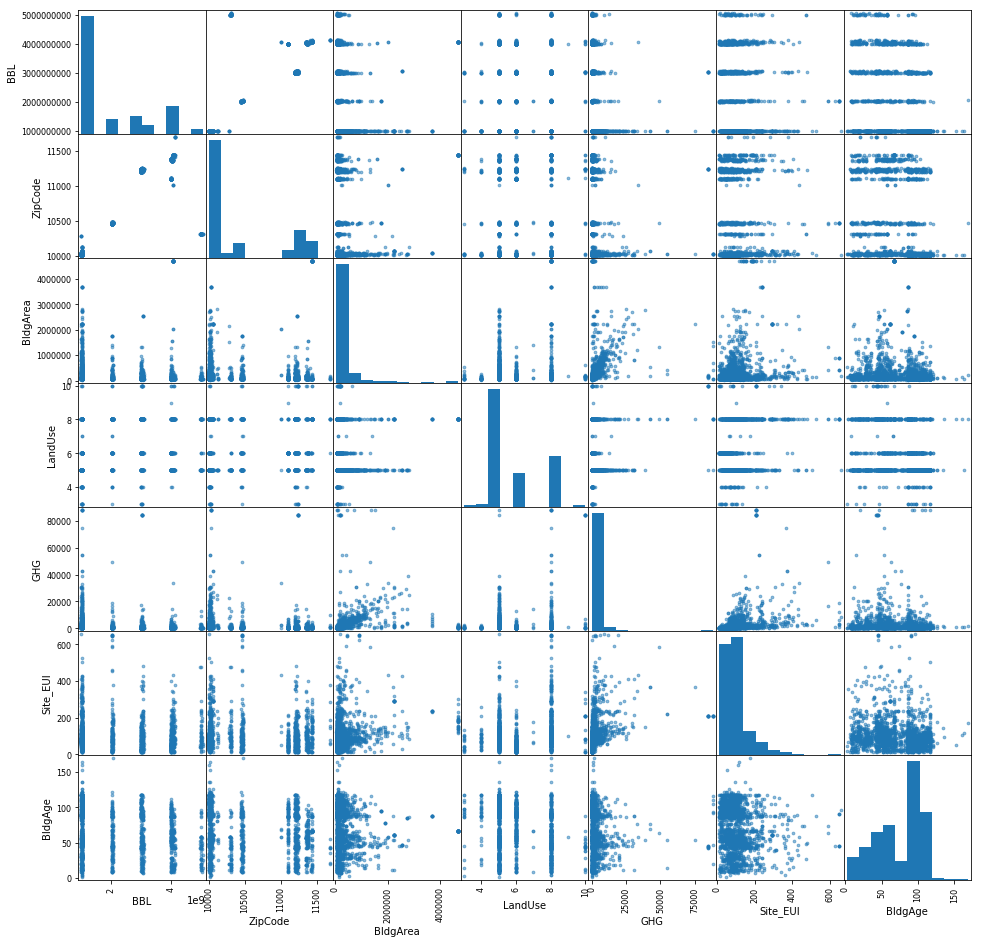

In [64]:

scatter_matrix (bblnrgdataCut, s=30, figsize=(16, 16))


In [65]:
#New
# Correlation metrix

bblnrgdataCut.corr(method='pearson', min_periods=1)

,BBL,ZipCode,BldgArea,LandUse,GHG,Site_EUI,BldgAge
BBL,1.000000,0.872803,0.055969,0.275076,-0.084465,-0.022166,-0.306938
ZipCode,0.872803,1.000000,0.078848,0.296728,-0.059788,-0.029215,-0.264379
BldgArea,0.055969,0.078848,1.000000,0.143752,0.188694,0.233717,-0.086930
LandUse,0.275076,0.296728,0.143752,1.000000,0.140851,0.263078,-0.243991
GHG,-0.084465,-0.059788,0.188694,0.140851,1.000000,0.309763,-0.103173
Site_EUI,-0.022166,-0.029215,0.233717,0.263078,0.309763,1.000000,-0.158221
BldgAge,-0.306938,-0.264379,-0.086930,-0.243991,-0.103173,-0.158221,1.000000


## Correlations:
### BBL vs ZipCode
### LandUse vs BldgArea
### LandUse vs ZipCode
### LandUse vs BBL
### BBL vs Age
### Age vs Zipcode
### Age vs LandUse

In [66]:
lm = smf.ols(formula='Site_EUI ~ GHG + ZipCode + BldgArea + BldgAge\
+ LandUse', data = bblnrgdataCut, missing='drop').fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Site_EUI   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     97.84
Date:                Wed, 03 May 2017   Prob (F-statistic):           4.29e-93
Time:                        21:21:36   Log-Likelihood:                -12265.
No. Observations:                2152   AIC:                         2.454e+04
Df Residuals:                    2146   BIC:                         2.458e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    212.6744     32.105      6.624      0.000     149.714     275.634
GHG            0.0022      0.000     11.465      0.000       0.002       0.003
ZipCode       -0.0173      0.003     -5.639      0.000      -0.023      -0.011
BldgArea    1.903e-05   2.39e-06      7.951      0.000    1.43e-05    2.37e-05
BldgAge       -0.2576      0.053     -4.818      0.000      -0.362      -0.153
LandUse       12.9729      1.250     10.380      0.000      10.522      15.424
==============================================================================
Omnibus:                     1375.453   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19062.523
Skew:                           2.822   Prob(JB):                         0.00
Kurtosis:                      16.443   Cond. No.                     1.54e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
bblnrgdataCut = bblnrgdataCut.dropna()
bblnrgdataCut.shape

(2152, 7)

In [68]:
X = bblnrgdataCut[['GHG', 'ZipCode', 'BldgArea', 'BldgAge', 'LandUse']]
Y = bblnrgdataCut.Site_EUI
y = lm.predict(X)
len(y)

2152

In [72]:
#New
#Using linear model from Sklearn pacakage
lm2 = LR()
lm2.fit(X, Y)


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
#New
#The result is the same with statsmodels
feature_cols = ['GHG', 'ZipCode', 'BldgArea', 'BldgAge', 'LandUse']
print('Coeffient:')
print(list(zip(feature_cols, lm2.coef_)))
print('R squared:')
print(lm2.score(X,Y))

Coeffient:
[('GHG', 0.0021981372110874715), ('ZipCode', -0.017251068764444367), ('BldgArea', 1.9033181569185216e-05), ('BldgAge', -0.25756497079052171), ('LandUse', 12.972854544438473)]
R squared:
0.185643899909


In [75]:
#NEW
#Cross Validation
OS_svm = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,
                           Y, test_size = 0.3, random_state = i+900)
    lm = LR().fit(X_train, y_train)
    OS_svm.append(lm.score(X_test, y_test))  
print('The test score R2 for SVR:')    
print(np.mean(OS_svm))



The test score R2 for SVR:
0.167667910245


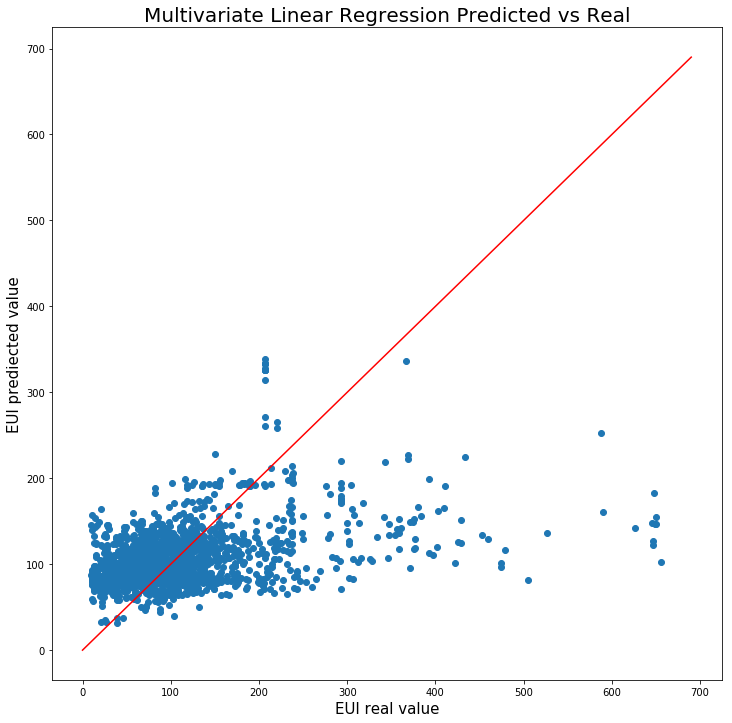

In [87]:
#NEW
#Plot predicted value vs. real value
fig = plt.figure(figsize=(12,12))
plt.scatter(bblnrgdataCut.Site_EUI, y)
plt.plot(range(0,700,10), range(0,700,10), c = 'r')
plt.xlabel('EUI real value', fontsize = 15)
plt.ylabel('EUI prediected value', fontsize = 15)
plt.title('Multivariate Linear Regression Predicted vs Real',fontsize = 20)



In [103]:
Residual = pd.DataFrame(bblnrgdataCut.Site_EUI - y)
Residual.reset_index(inplace = True)
Residual = Residual.drop(['index'], axis = 1)
Residual.head()

,0
0,-139.502218
1,-83.147993
2,-75.444042
3,-75.444042
4,7.799919


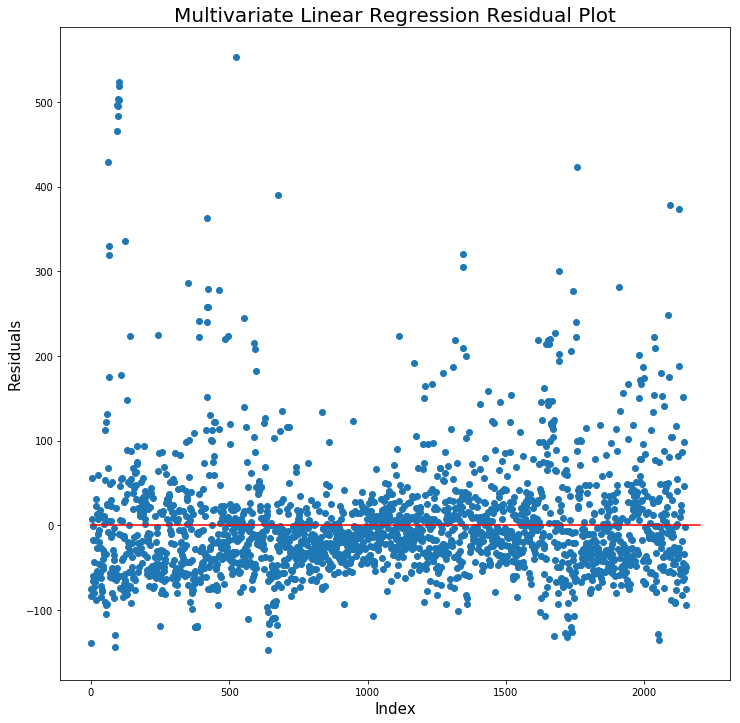

In [111]:
#NEW
#Plot predicted value vs. real value
fig = plt.figure(figsize=(12,12))
plt.scatter(Residual.index, Residual[0])
plt.plot([0,2200], [0,0], c = 'r')
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Residuals', fontsize = 15)
plt.title('Multivariate Linear Regression Residual Plot',fontsize = 20)



In [83]:
svr_rbf = SVR(kernel='rbf')

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,
                           Y, test_size = 0.3, random_state =999)
XX_train = X_train.reset_index().drop('index', axis = 1)
XX_test = X_test.reset_index().drop('index', axis = 1)


In [85]:
gamma_range = [0.01, 0.001, 0.0001]
epsilon_range = [x * 0.1 for x in range(0, 2)]
C_range = range(1, 2500, 500)

# To speed up, we first find the optimal paratemers for C and gamma and then set them directly in the method call
tuned_parameters = [{
    #'kernel': ['rbf', 'linear'],
    'C': C_range,
    'gamma': gamma_range,
    'epsilon': epsilon_range}]

# search for the best parameters with crossvalidation.
svr_elect = GridSearchCV(SVR(kernel='rbf'), param_grid = tuned_parameters, verbose = 0)

# Fit regression model
y_elect = svr_elect.fit(XX_train, y_train).predict(XX_test)

print 'Optimum parameters C, epsilon and gamma for SVR: ', svr_elect.best_params_

print "The test score R2 for SVR: ", svr_elect.score(XX_test, y_test)

print("SVR mean squared error: %.2f"
      % np.mean((y_test - svr_elect.predict(XX_test)) ** 2))




Optimum parameters C, epsilon and gamma for SVR:  {'epsilon': 0.0, 'C': 501, 'gamma': 0.0001}
The test score R2 for SVR:  0.0255443682828
SVR mean squared error: 5757.37


In [86]:
OS_svm = []
OS_mse = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,
                           Y, test_size = 0.3, random_state =i)
    #yy_test = y_test['Weather Normalized Site EUI (kBtu/ft²)']
    XX_test = X_test.reset_index().drop('index', axis = 1)
    svr_rbf = SVR(kernel='rbf',epsilon = 0.0, C = 501, gamma = 0.0001)
    OS_svm.append(svr_rbf.fit(X_train, y_train).score(X_test,y_test))  
    OS_mse.append(np.mean((y_test - svr_rbf.fit(X_train, y_train).predict(XX_test)) ** 2))

print('The test score R2 for SVR:')        
print(np.mean(OS_svm))
print("SVR mean squared error: %.2f"
      %np.mean(OS_mse))

The test score R2 for SVR:
0.0465996982721
SVR mean squared error: 5870.38


In [112]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,
                           Y, test_size = 0.3, random_state =999)
XX_train = X_train.reset_index().drop('index', axis = 1)
XX_test = X_test.reset_index().drop('index', axis = 1)

In [117]:
regressor = RandomForestRegressor()
gr = GridSearchCV(regressor, param_grid={'max_depth': range(1,100)})
rf_gr = gr.fit(X_train, y_train)
print (rf_gr.best_params_)

{'max_depth': 47}


In [120]:
OS_rf = []
OS_mse = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,
                           Y, test_size = 0.3, random_state =i)
    #yy_test = y_test['Weather Normalized Site EUI (kBtu/ft²)']
    XX_test = X_test.reset_index().drop('index', axis = 1)
    rf = RandomForestRegressor(max_depth=47)
    OS_rf.append(rf.fit(X_train, y_train).score(X_test,y_test))  
    OS_mse.append(np.mean((y_test - rf.fit(X_train, y_train).predict(XX_test)) ** 2))

print('The test score R2 for Random Forest:')        
print(np.mean(OS_rf))
print("SVR mean squared error: %.2f"
      %np.mean(OS_mse))

The test score R2 for Random Forest:
0.518303740159
SVR mean squared error: 2917.72


In [122]:
rf = RandomForestRegressor(max_depth=47).fit(X,Y)
y = rf.predict(X)
len(y)

2152

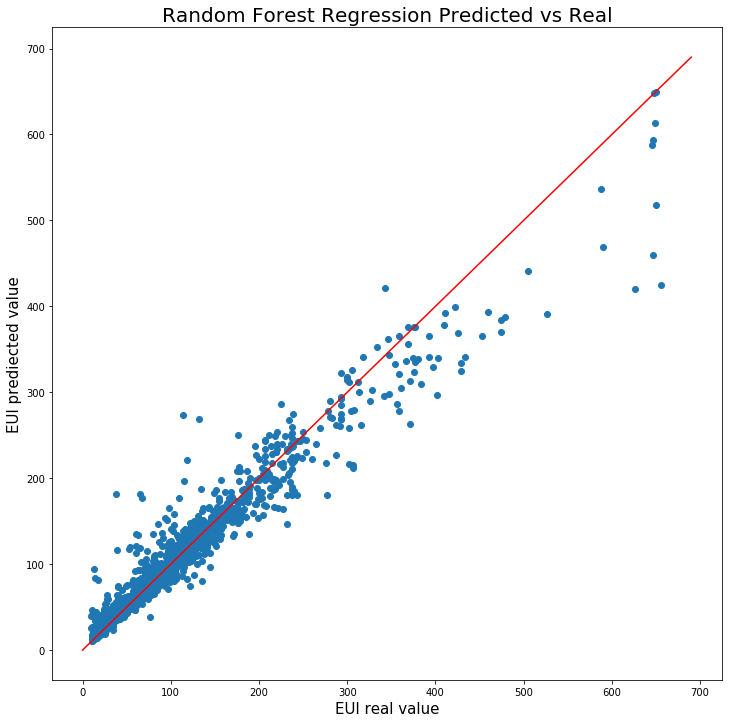

In [123]:
fig = plt.figure(figsize=(12,12))
plt.scatter(bblnrgdataCut.Site_EUI, y)
plt.plot(range(0,700,10), range(0,700,10), c = 'r')
plt.xlabel('EUI real value', fontsize = 15)
plt.ylabel('EUI prediected value', fontsize = 15)
plt.title('Random Forest Regression Predicted vs Real',fontsize = 20)




In [124]:
Residual = pd.DataFrame(bblnrgdataCut.Site_EUI - y)
Residual.reset_index(inplace = True)
Residual = Residual.drop(['index'], axis = 1)
Residual.head()

,Site_EUI
0,-21.32
1,-13.66
2,-0.65
3,-0.65
4,-55.29


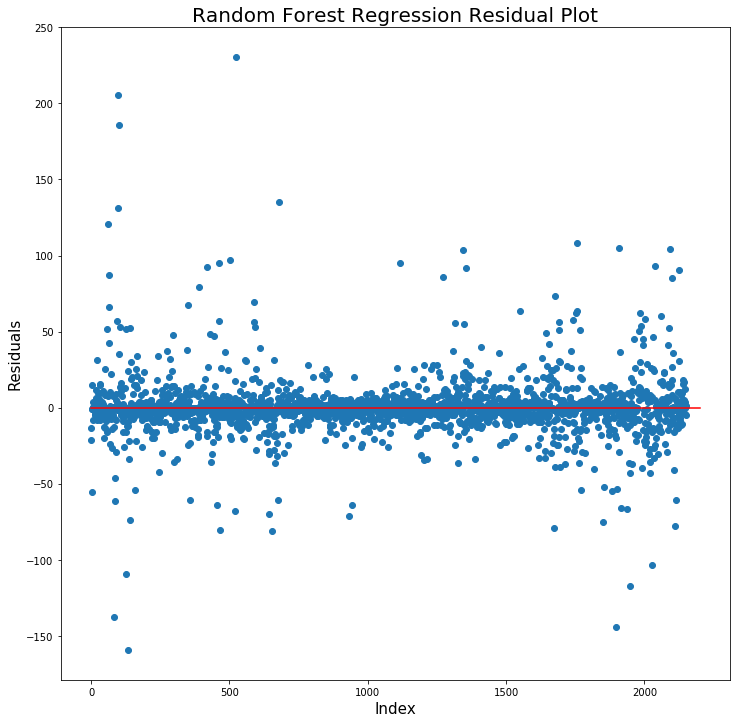

In [127]:
#NEW
#Plot predicted value vs. real value
fig = plt.figure(figsize=(12,12))
plt.scatter(Residual.index, Residual['Site_EUI'])
plt.plot([0,2200], [0,0], c = 'r')
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Residuals', fontsize = 15)
plt.title('Random Forest Regression Residual Plot',fontsize = 20)


